In [2]:
import pandas as pd

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,precision_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.datasets import *
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [7]:
iris=load_iris()

In [8]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [26]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.2)

In [27]:
import warnings
warnings.filterwarnings('ignore')

def model_score(Model,X_train,X_test,y_train,y_test):
    Model.fit(X_train,y_train)
    score=Model.score(X_test,y_test)
    return score

In [28]:
model_score(MultinomialNB(),X_train,X_test,y_train,y_test)

1.0

In [29]:
dt_score = model_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)
rn_score = model_score(RandomForestClassifier(),X_train,X_test,y_train,y_test)
svc_score = model_score(SVC(),X_train,X_test,y_train,y_test)
nb_score = model_score(MultinomialNB(),X_train,X_test,y_train,y_test)
lr_score = model_score(LogisticRegression(),X_train,X_test,y_train,y_test)

In [30]:
all_score=[dt_score,rn_score,svc_score,nb_score,lr_score]
all_score

[0.9333333333333333, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667]

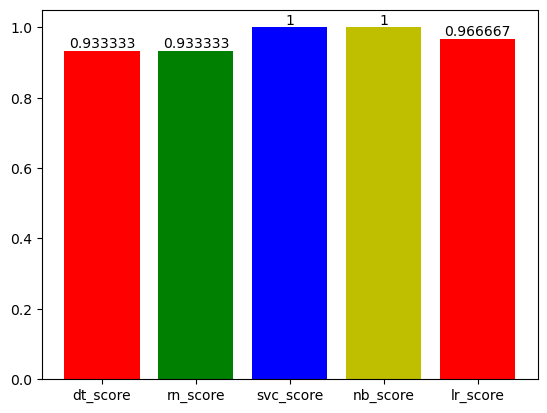

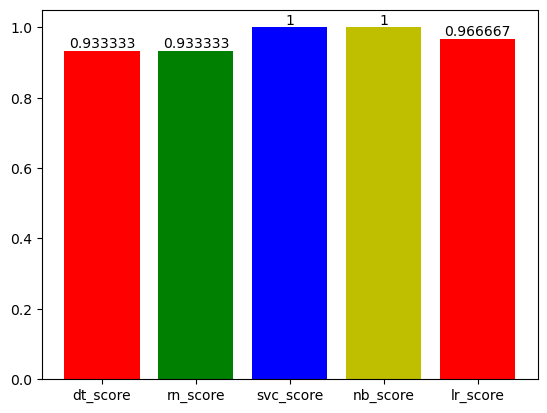

In [31]:
ax=plt.bar(models,all_score,color=list('rgby'))
plt.bar_label(ax)
plt.show(0)

In [18]:
models=['dt_score','rn_score','svc_score','nb_score','lr_score']

In [33]:
kf=KFold(n_splits=3)

In [35]:
kf.split(['Arjun','Parteek','Sumit','Jatin','Deepak','Manjeet'])

<generator object _BaseKFold.split at 0x0000021ADFA15EE0>

In [36]:
list(kf.split(['Arjun','Parteek','Sumit','Jatin','Deepak','Manjeet']))

[(array([2, 3, 4, 5]), array([0, 1])),
 (array([0, 1, 4, 5]), array([2, 3])),
 (array([0, 1, 2, 3]), array([4, 5]))]

In [37]:
# train Data /Test Data index Number (array([2, 3, 4, 5]), array([0, 1])

In [39]:
for i,j in kf.split(['Arjun','Parteek','Sumit','Jatin','Deepak','Manjeet']):
    print(i,j)

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]


In [40]:
for train_index,test_index in kf.split(iris.data):
    print(train_index,test_index)

[ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149] [50 51 52 53 54 55 56 57 58 59 6

In [50]:
dt_score=[]
rn_score=[]
svc_score=[]
nb_score=[]
lr_score=[]



kf=KFold(n_splits=6)
for train_index,test_index in kf.split(iris.data):
    X_train,X_test,y_train,y_test=iris.data[train_index],iris.data[test_index],\
    iris.target[train_index],iris.target[test_index]
    
    
    dt_score.append(model_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    rn_score.append(model_score(RandomForestClassifier(),X_train,X_test,y_train,y_test))
    svc_score.append(model_score(SVC(),X_train,X_test,y_train,y_test))
    nb_score.append(model_score(MultinomialNB(),X_train,X_test,y_train,y_test))
    lr_score.append(model_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    
    
    
    

In [51]:
dt_score

[1.0, 1.0, 0.88, 0.92, 0.92, 0.8]

In [52]:
rn_score

[1.0, 1.0, 0.92, 0.92, 0.92, 0.84]

In [53]:
nb_score

[1.0, 1.0, 0.0, 0.0, 0.0, 0.0]

In [54]:
svc_score

[1.0, 1.0, 0.88, 0.92, 0.84, 0.76]

In [55]:
lr_score

[1.0, 1.0, 0.92, 0.92, 0.88, 0.84]

In [58]:
print(np.array(dt_score).mean())
print(np.array(rn_score).mean())
print(np.array(nb_score).mean())
print(np.array(svc_score).mean())
print(np.array(lr_score).mean())

0.9199999999999999
0.9333333333333332
0.3333333333333333
0.8999999999999999
0.9266666666666666


In [62]:
# Stratified K- Fold

dt_score=[]
rn_score=[]
svc_score=[]
nb_score=[]
lr_score=[]



kf=StratifiedKFold(n_splits=6)
for train_index,test_index in kf.split(iris.data,iris.target):
    X_train,X_test,y_train,y_test=iris.data[train_index],iris.data[test_index],\
    iris.target[train_index],iris.target[test_index]
    
    
    dt_score.append(model_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    rn_score.append(model_score(RandomForestClassifier(),X_train,X_test,y_train,y_test))
    svc_score.append(model_score(SVC(),X_train,X_test,y_train,y_test))
    nb_score.append(model_score(MultinomialNB(),X_train,X_test,y_train,y_test))
    lr_score.append(model_score(LogisticRegression(),X_train,X_test,y_train,y_test))
    
    
    

In [63]:
print(np.array(dt_score).mean())
print(np.array(rn_score).mean())
print(np.array(nb_score).mean())
print(np.array(svc_score).mean())
print(np.array(lr_score).mean())

0.9533333333333333
0.9533333333333333
0.9533333333333333
0.98
0.9666666666666667


In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(DecisionTreeClassifier(),iris.data,iris.target)

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

In [73]:

dt_score=cross_val_score(DecisionTreeClassifier(),iris.data,iris.target)
rn_score=cross_val_score(RandomForestClassifier(),iris.data,iris.target)
svc_score=cross_val_score(SVC(),iris.data,iris.target)
nb_score=cross_val_score(MultinomialNB(),iris.data,iris.target)
lr_score=cross_val_score(LogisticRegression(),iris.data,iris.target)

In [74]:
print(np.array(dt_score).mean())
print(np.array(rn_score).mean())
print(np.array(nb_score).mean())
print(np.array(svc_score).mean())
print(np.array(lr_score).mean())

0.9666666666666668
0.96
0.9533333333333334
0.9666666666666666
0.9733333333333334
